## Problem Set 1 
### Made by student of SkolTech German Devchich

In some portions of this document (not exceeding 15% of the entire text) Artificial Intelligence assistant, particularly Generative AI, has been used to improve, rephrase, shorten, or summarize the content. The technologies used include ChatGPT-4o

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_theme(style="dark")  
# 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

**A. (5 pts)** Plot the probability density function p(x) of a one dimensional Gaussian distribution **N(x; 1,1).**
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().

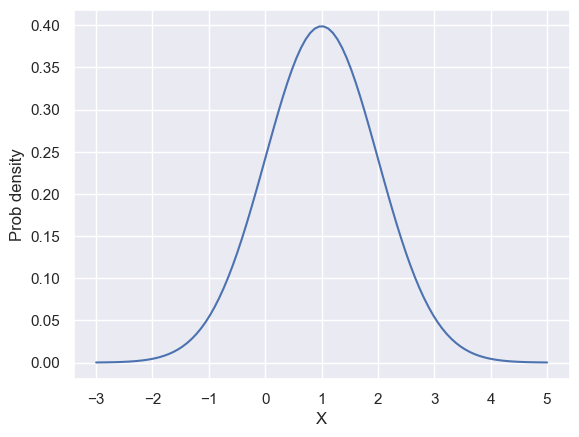

In [2]:
# plt.gca().set_aspect('equal')
x = np.linspace(-3,5,100)
y = stats.norm.pdf(x,1,1)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid(True)
plt.show()

**B. (5 pts)** Calculate the probability mass that the random variable X is less than 0, that is, Pr{X $\leq$ 0} $\int_{-\infty}^0 p(x)dx $ 

Hint: you might want to use the function norm.cdf().

Probability mass from -inf to 0 is : 0.15866


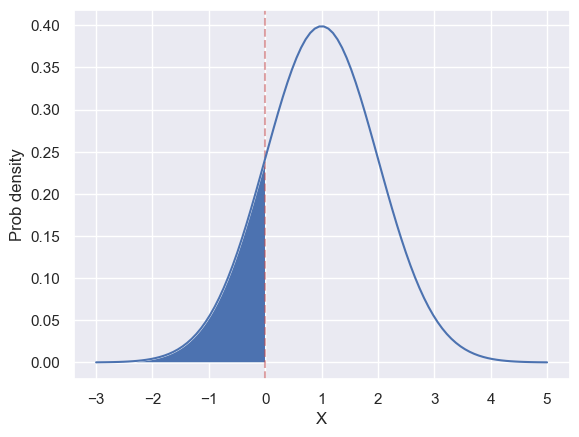

In [3]:
prob_mass = stats.norm.cdf(0,loc=1, scale=1) - stats.norm.cdf(-np.inf,loc=1, scale=1 )
print(f"Probability mass from -inf to 0 is : {np.round(prob_mass,5)}")

plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

tmp = np.linspace(-3,0)
y_tmp = stats.norm.pdf(tmp,1,1)
plt.fill_between(tmp,y_tmp)

plt.plot(x,y)
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.grid()
plt.show()

**C. (5 pts)** Consider the new observation variable $ z $, it gives information about the variable $ x $ by the likelihood function $ p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) $, with variance $ \sigma^2 = 0.2 $. Apply the Bayes’ theorem to derive the posterior distribution, $ p(x|z) $, given an observation $ z = 0.75 $ and plot it. For a better comparison, plot the prior distribution, $ p(x) $, too.

### Bayes' theorem:
$
p(x | z ) = \frac{p(z | x) p(x)}{p(z)}
$


$
p(z|x) = \mathcal{N} \left( z; x, \sigma^2 \right) \\
$

Prior distribution 
$
p(x) = \mathcal{N}(x; 1,1) 
$


<!-- $$
p(x | z) \propto e^{-\left( \frac{x^2}{2\sigma_0^2} - \frac{2\mu_0 x}{2\sigma_0^2} + \frac{x^2}{2\sigma^2} - \frac{2z x}{2\sigma^2} \right)}
$$ -->


<!-- $$
f(x) = A_1 A_2 e^{-\frac{x^2}{2} \left( \frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2} \right) + x \left( \frac{\mu_1}{\sigma_1^2} + \frac{\mu_2}{\sigma_2^2} \right) - \frac{\mu_1^2}{2\sigma_1^2} - \frac{\mu_2^2}{2\sigma_2^2} }
$$ -->

If $(x) = \mathcal{N}(x; \mu_0,\sigma_0^2)$ and $p(z \mid x) = \mathcal{N}(z; x,\sigma^2$,
Then the posterior $p(x \mid z)$ is also a Gaussian with mean
$$
\mu_{\text{post}} \;=\;
\frac{\sigma_0^2}{\sigma_0^2 + \sigma^2}\,z \;+\;
\frac{\sigma^2}{\sigma_0^2 + \sigma^2}\,\mu_0.
$$
and the variance
$$
\sigma_{\text{post}}^2 \;=\;
\frac{\sigma_0^2\,\sigma^2}{\sigma_0^2 + \sigma^2}.
$$

Another way to calculate use a numerical integration:
$$

p(x\mid z)\;=\;\frac{p(z\mid x)\,p(x)}{\int p(z\mid x')\,p(x')\,dx'}.
$$


In [4]:
sig_0_2 = 1
sig_z_2 = 0.2
mean_0 = 1
mean_z = x

z = 0.75

mean_post = (sig_0_2 / (sig_0_2 + sig_z_2)) * z + (sig_z_2 / (sig_0_2 + sig_z_2)) * mean_0
sig_post_2 = (sig_0_2 * sig_z_2) / (sig_z_2 + sig_0_2)
print(f"Expectation of posterior : {mean_post}")
print(f"Variance of posterior : {sig_post_2}")


def calculate_normalisation_coef():
    x = np.linspace(-1000,1000,100000)
    p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
    p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
    dx = x[1] - x[0]
    coef = np.sum(p_z_x * p_x) * dx
    return coef
print(calculate_normalisation_coef())


Expectation of posterior : 0.7916666666666667
Variance of posterior : 0.16666666666666669
0.3548213064777798


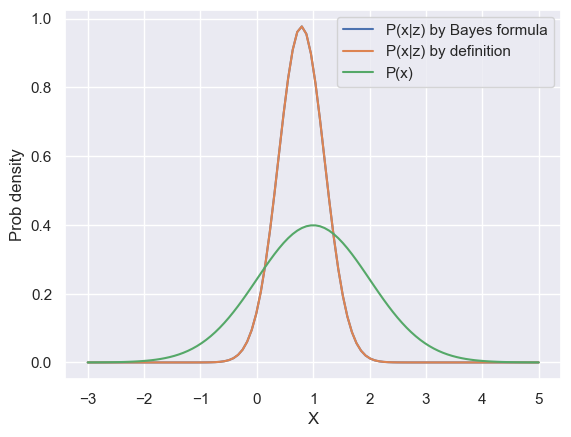

Is P(x|z) by Bayes formula close to P(x|z) by definition: True


In [5]:
# p_x_z_ = stats.norm.pdf(x,mean_post,np.sqrt(sig_post_2)) / calculate_normalisation_coef()
p_x = stats.norm.pdf(x,mean_0,np.sqrt(sig_0_2))
p_z_x = stats.norm.pdf(z,x,np.sqrt(sig_z_2))
p_x_z_def = p_z_x * p_x / calculate_normalisation_coef()

p_x_z_form = stats.norm.pdf(x, mean_post , np.sqrt(sig_post_2))
plt.plot(x,p_x_z_form, label = "P(x|z) by Bayes formula")
plt.plot(x,p_x_z_def, label = "P(x|z) by definition")
plt.plot(x,p_x, label = "P(x)")
# plt.gca().set_aspect('equal')
plt.xlabel("X")
plt.ylabel("Prob density")
plt.legend()
plt.grid()
plt.show()
print(f"Is P(x|z) by Bayes formula close to P(x|z) by definition: {np.all(np.isclose(p_x_z_def,p_x_z_form))}")

## Task 2: Multivariate Gaussian (35 points)

A. (15 pts) Write the function plot2dcov which plots the 2d contour given three core parameters: mean,covariance, and the iso-contour value k. You may add any other parameter such as color, number of points,etc.
Then, use $\texttt{plot2dcov}$ to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:
$ 
\mathcal{N} \left( 
\begin{bmatrix} 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} 
\right),
\quad
\mathcal{N} \left( 
\begin{bmatrix} 5 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 3 & -0.4 \\ -0.4 & 2 \end{bmatrix} 
\right)
\quad \text{and} \quad
\mathcal{N} \left( 
\begin{bmatrix} 2 \\ 2 \end{bmatrix}, 
\begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix} 
\right).
$
Use the $\texttt{set\_aspect('equal')}$ command and comment on them.

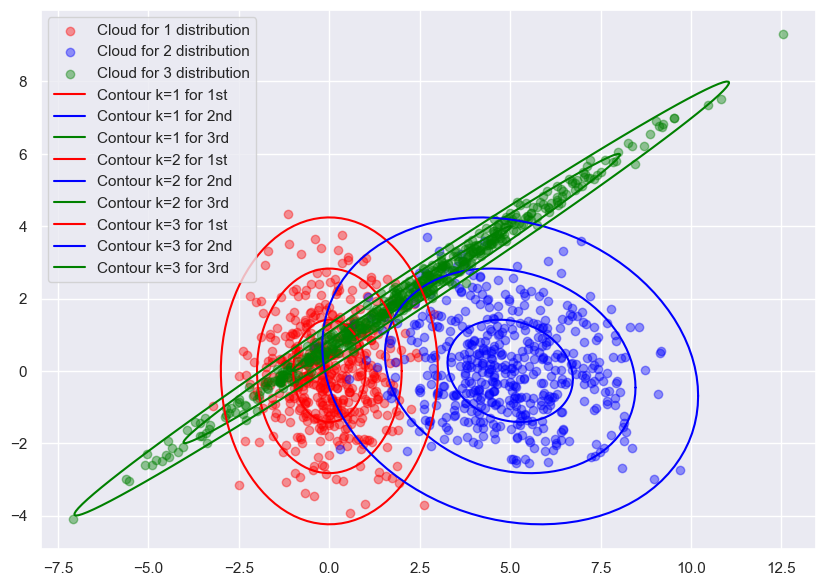

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky, svd

def plot2dcov(mean: np.array, covariance: np.array, k_values: list, method: str = "SVD", num_points: int = 100):
    angles = np.linspace(0, np.pi*2, num_points)
    points = np.hstack([np.cos(angles)[:, None], np.sin(angles)[:, None]])

    if method == "SVD":
        u, s, vh = svd(covariance)
        A = u @ np.diag(np.sqrt(s))
    elif method == "cholesky":
        A = cholesky(covariance)

    contours = {}
    for k in k_values:
        contour = (A @ (points * float(k)).T + mean).T
        contours[k] = contour

    return contours

mean_1 = np.array([[0], [0]])
cov_1 = np.array([[1, 0.0], [0.0, 2]])

mean_2 = np.array([[5], [0]])
cov_2 = np.array([[3, -0.4], [-0.4, 2]])

mean_3 = np.array([[2], [2]])
cov_3 = np.array([[9.1, 6.0], [6.0, 4]])

k_levels = [1, 2, 3]
colors = ['red', 'blue', 'green']

cloud_1_points = np.random.multivariate_normal(mean_1.flatten(), cov_1, size=500)
cloud_2_points = np.random.multivariate_normal(mean_2.flatten(), cov_2, size=500)
cloud_3_points = np.random.multivariate_normal(mean_3.flatten(), cov_3, size=500)

contours_1 = plot2dcov(mean_1, cov_1, k_levels, method='cholesky')
contours_2 = plot2dcov(mean_2, cov_2, k_levels, method='cholesky')
contours_3 = plot2dcov(mean_3, cov_3, k_levels, method='cholesky')

plt.figure(figsize=(10, 7))

plt.scatter(cloud_1_points[:, 0], cloud_1_points[:, 1], alpha=0.4, label='Cloud for 1 distribution', color=colors[0])
plt.scatter(cloud_2_points[:, 0], cloud_2_points[:, 1], alpha=0.4, label='Cloud for 2 distribution', color=colors[1])
plt.scatter(cloud_3_points[:, 0], cloud_3_points[:, 1], alpha=0.4, label='Cloud for 3 distribution', color=colors[2])

for k in k_levels:
    plt.plot(contours_1[k][:, 0], contours_1[k][:, 1], label=f'Contour k={k} for 1st', color=colors[0])
    plt.plot(contours_2[k][:, 0], contours_2[k][:, 1], label=f'Contour k={k} for 2nd', color=colors[1])
    plt.plot(contours_3[k][:, 0], contours_3[k][:, 1], label=f'Contour k={k} for 3rd', color=colors[2])

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

Comments: The graph clearly shows how the spread of points increases with increasing covariance, which is confirmed by the increasing size of isocontours. Each distribution has its own peculiarity in orientation: the first (red) is stretched along the y-axis, which corresponds to the covariance $\Sigma = [[1, 0], [0, 2]]$, the second (blue) has a small correlation, which gives it a weak slope, and the third (green) is strongly stretched along the diagonal, as it has a high correlation (6.0), creating a “long ellipse” effect. The k=1,2,3 isocontours show standard deviations from the mean, and the k=3 contour covers almost all points, confirming the three sigma rule that about 99.7% of the data should fall within three standard deviations. Most points fall within the predicted limits, indicating that the data are close to a normal distribution, but there are outliers in the green distribution indicating possible bias or additional factors affecting the data.

B. (5 pts) Write the equation of sample mean and sample covariance of a set of points ${x_i}$, in vector form as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.

## Sample mean:
$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

## Sample variance:
$$
\bar{\Sigma}_x = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \bar{x}) (x_i - \bar{x})^T
$$

C. (15 pts) Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\mathcal{N}(0,1)$. In particular, draw and plot 200 samples from 

$$
\mathcal{N} \left( 
\begin{bmatrix} 2 \\ 2 \end{bmatrix}, 
\begin{bmatrix} 1 & 1.3 \\ 1.3 & 3 \end{bmatrix} 
\right)
$$

also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try a different number of samples (e.g. 50, 400). Comment briefly on the results.

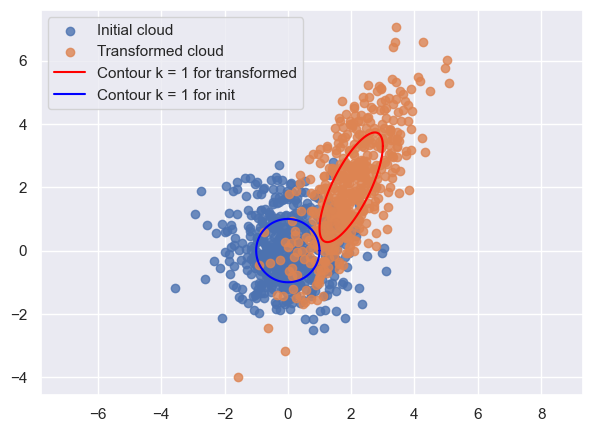

In [7]:
def plot2dcov(mean: np.array, covariance: np.array, k_values: list, method: str = "SVD", num_points: int = 30):
    angles = np.linspace(0, np.pi * 2, num_points)
    points = np.hstack([np.cos(angles)[:, None], np.sin(angles)[:, None]])

    cloud_list = []
    for k in k_values:
        scaled_points = points * float(k)
        if method == "SVD":
            u, s, vh = np.linalg.svd(covariance)
            A = u @ np.diag(np.sqrt(s))
        elif method == "cholesky":
            A = cholesky(covariance)
        cloud = (A @ scaled_points.T + mean).T
        cloud_list.append(cloud)
    
    return np.vstack(cloud_list)

number_samples = 500
x = np.random.normal(loc=0, scale=1, size=(number_samples, 2))

cov = np.array([
    [1, 1.3],
    [1.3, 3]
])
mean = np.array([[2], [2]])

A = cholesky(cov)
transformed = (A @ x.T + mean).T

colors = ['red', 'blue', 'green']

cloud_transformed_contour = plot2dcov(mean=mean, covariance=cov, k_values=[1], num_points=100, method='cholesky')
cloud_init_contour = plot2dcov(mean=np.zeros(shape=(2,1)), covariance=np.eye(2), k_values=[1], num_points=100, method='cholesky')

plt.figure(figsize=(7, 5))
plt.scatter(x[:, 0], x[:, 1], alpha=0.8, label='Initial cloud')
plt.scatter(transformed[:, 0], transformed[:, 1], alpha=0.8, label='Transformed cloud')
plt.plot(cloud_transformed_contour[:, 0], cloud_transformed_contour[:, 1], label='Contour k = 1 for transformed', color=colors[0])
plt.plot(cloud_init_contour[:, 0], cloud_init_contour[:, 1], label='Contour k = 1 for init', color=colors[1])

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

Comments: The graph shows how the standard normal distribution (blue) is transformed using the covariance matrix and mean shift, becoming an elongated distribution (orange) with mean (2,2). The change in shape and orientation of the k=1 isocontour corresponds to the given covariance, which confirms the correctness of the affine transformation.

## Task 3 
**A. (5 pts)** Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.

$
\mu_t = E[x_t] = E[x_{t-1} + \Delta t A_t + \varepsilon_t]
$

Due to the fact that $E[\varepsilon_t] = 0$ 


We have $\mu_t = \mu_{t-1} + \Delta t A_t$



$
\Sigma_t = E[(x_t - \mu_t)(x_t - \mu_t)^T] =
$

$
E[(x_{t-1} - \mu_{t-1} + \varepsilon_t)(x_{t-1} - \mu_{t-1} + \varepsilon_t)^T] = 
E[(x_{t-1} - \mu_{t-1})(x_{t-1} - \mu_{t-1})^T] + E[\varepsilon_t \varepsilon_t^T]
$

Since the noise $\varepsilon_t$ is state independent, then:
$
E[(x_{t-1} - \mu_{t-1}) \varepsilon_t^T] = 0
$

$
\Sigma_t = \Sigma_{t-1} + R
$

$
x_t \sim \mathcal{N}(\mu_t, \Sigma_t) = \mathcal{N}(\mu_{t-1} + \Delta t A_t, \Sigma_{t-1} + R)
$

**B. (5 pts)** Show how to use this result iteratively for multiple propagations.

Now we have: $\mu_t = \mu_{t-1} + \Delta t A_t$ and $\Sigma_t = \Sigma_{t-1} + R$

Lets imagine that we propagating the system on n - steps forward 

$
x_t = x_0 + \sum_{i=1}^{t} (\Delta t A_i) + \sum_{i=1}^{t} \varepsilon_i
$

Each step adds $\Delta t A_t $, so after n steps:
$
\mu_n = \mu_0 + n \cdot \Delta t A
$

Each step increases the covariance by R , so:
$
\Sigma_n = \Sigma_0 + n \cdot R
$

Final distribution is: $
x_n \sim \mathcal{N}(\mu_0 + n\Delta t A, \Sigma_0 + n R)
$

**C. (7 pts)** Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, \dots, 5$ and the control sequence $u_t = [3, 0]^\top$ for all times $t$. The PDF for the initial state is

$$
\begin{bmatrix} x \\ y \end{bmatrix}_0 \sim \mathcal{N} 
\left( 
\begin{bmatrix} 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}
\right).
$$

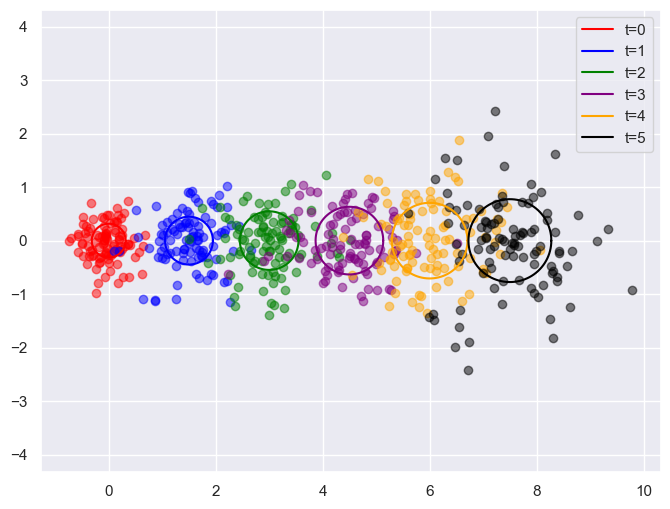

In [8]:
mu_0 = np.array([0, 0])  
Sigma_0 = np.array([[0.1, 0], 
                    [0, 0.1]])  
A = np.array([3, 0])  
dt = 0.5
R = np.array([[0.1, 0], 
              [0, 0.1]]) 

def plot_ellipse(mean, cov, color='red', label=None):
    angles = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(angles), np.sin(angles)]) 
    L = cholesky(cov) 
    ellipse = (L @ circle + mean[...,np.newaxis]).T 
    plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t = mu_0 + t * dt * A
    Sigma_t = Sigma_0 + t * R
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    samples = np.random.multivariate_normal(mu_t, Sigma_t, size=100)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

**D. (8 pts)** Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed:

$$
\begin{bmatrix} x \\ y \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}_{t-1} +
\begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_t +
\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t.
$$

All the other parameters and controls are the same as defined earlier.

Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for time indexes $t = 0, \dots, 5$ in the same figure.

Now we have a dynamic: $
\begin{bmatrix} x \\ y \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}_{t-1} +
\begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_t +
\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t
$

Transformation Matrix:
$F = \begin{bmatrix} 1 & 0 \\ 0.1 & 1 \end{bmatrix}$

Noise the same:
$ 
\eta_t \sim \mathcal{N} \left( \begin{bmatrix} 0 \\ 0 \end{bmatrix},
\begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix} \right)
$

Since, the expectation can be calculated:

$$
X_t = F X_{t-1} + \Delta t \, U_t + \epsilon_t
$$

$$
E \{ X_t \} = E \{ F X_{t-1} \} + E \{ \Delta t U_t \} + E \{ \epsilon_t \}
$$

$$
= F \mu_{t-1} + \Delta t U_t + 0
$$

The covariance matrix:
$ 
\Sigma_t = F \Sigma_{t-1} F^T + R
$

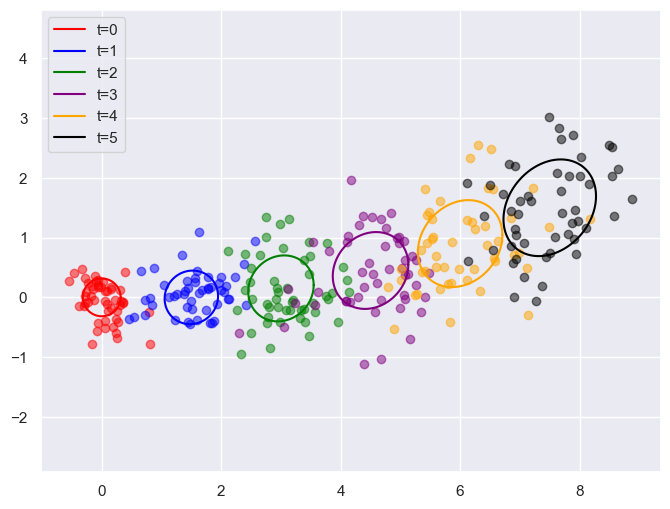

In [9]:
def plot_ellipse(mean, cov, color='red', label=None):
        angles = np.linspace(0, 2 * np.pi, 100)
        circle = np.array([np.cos(angles), np.sin(angles)]) 
        L = cholesky(cov) 
        ellipse = (L @ circle + mean[..., np.newaxis]).T 
        plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

def propagate_system(mean: np.array, 
                     cov: np.array, 
                     n_steps: int,
                     cov_noise: np.array,
                     F: np.array, 
                     B: np.array, 
                     control: np.array):
    for _ in range(n_steps):
        mean = F @ mean + B @ control 
        cov = F @ cov @ F.T + cov_noise
    return mean, cov

mu_0 = np.array([0, 0])  
Sigma_0 = np.array([[0.1, 0], 
                    [0, 0.1]])  
A = np.array([3, 0])  
dt = 0.5
R = np.array([[0.1, 0], 
              [0, 0.1]]) 

F = np.array([[1, 0], 
              [0.1, 1]])

B = np.array([[dt, 0], 
              [0, dt]])

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t, Sigma_t = propagate_system(mu_0, Sigma_0, t, R, F, B, A)
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    samples = np.random.multivariate_normal(mu_t, Sigma_t, size=50)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

**E. (7 pts)** Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model is:

$$
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1} +
\begin{bmatrix} \cos(\theta) \Delta t & 0 \\ \sin(\theta) \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v \\ w \end{bmatrix}_t +
\begin{bmatrix} \eta_x \\ \eta_y \\ \eta_\theta \end{bmatrix}_t,
$$

being 

$$
\begin{bmatrix} \eta_x \\ \eta_y \\ \eta_\theta \end{bmatrix}_t \sim \mathcal{N} 
\left(
\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 0.2 & 0 & 0 \\ 0 & 0.2 & 0 \\ 0 & 0 & 0.01 \end{bmatrix}
\right)
$$

and the PDF for the initial state

$$
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_0 \sim 
\mathcal{N} \left( 
\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.1 \end{bmatrix}
\right).
$$

Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the control $u_t = [3, 1.5]^\top$ showing the propagated Gaussian by plotting the 1-sigma iso-contour. Angles are in radians. *Hint:* you can marginalize out $\theta$ and plot the corresponding $\Sigma_{(xy)}$ as explained in class.

## Unicycle Model Formulas

#### Status Update (Expectation)
$$
\mu_t =
\begin{bmatrix} 
x \\ y \\ \theta
\end{bmatrix}_t =
\begin{bmatrix} 
x \\ y \\ \theta
\end{bmatrix}_{t-1} +
\begin{bmatrix} 
\Delta t \cdot V_t \cdot \cos \theta \\
\Delta t \cdot V_t \cdot \sin \theta \\
\Delta t \cdot \omega_t
\end{bmatrix}
$$

### Linearisation
$$
G_t =
\begin{bmatrix}
1 & 0 & -\sin(\theta) \cdot \Delta t \cdot V_t  \\
0 & 1 &  \cos(\theta) \cdot \Delta t \cdot V_t \\
0 & 0 & 1
\end{bmatrix}
$$

### Covariance
$$
\Sigma_t = G_t \Sigma_{t-1} G_t^T + R
$$

### Noise
$$
\eta_t \sim \mathcal{N}(0, R)
$$

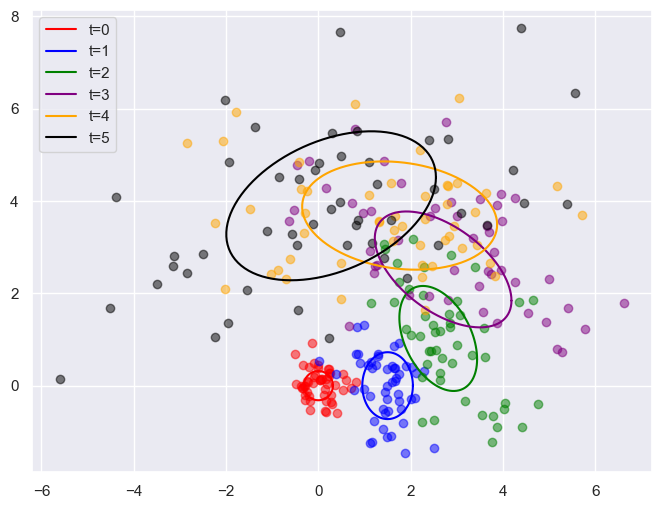

In [10]:
def plot_ellipse(mean, cov, color='red', label=None):
    angles = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(angles), np.sin(angles)]) 
    L = cholesky(cov[:2, :2])  # Берём только x и y
    ellipse = (L @ circle + mean[:2, np.newaxis]).T 
    plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

def propagate_system(mean: np.array, 
                     cov: np.array, 
                     n_steps: int,
                     cov_noise: np.array,
                     dt: float,
                     control: np.array):

    for _ in range(n_steps):
        x, y, theta = mean
        v, w = control  

        G = np.array([
             [1, 0, -v*np.sin(theta)*dt],
             [0, 1, v*np.cos(theta)*dt],
             [0, 0, 1]
        ])

        mean = mean + np.array([
            dt * np.cos(theta) * v,
            dt * np.sin(theta) * v,
            dt * w
        ])

        cov = G @ cov @ G.T + cov_noise
    
    return mean, cov

mu_0 = np.array([0, 0, 0])  # (x, y, theta)
Sigma_0 = np.array([[0.1, 0, 0], 
                    [0, 0.1, 0],
                    [0, 0, 0.1]])  
A = np.array([3, 1.5])  # (V, W)
dt = 0.5
R = np.array([[0.2, 0, 0], 
              [0, 0.2, 0],
              [0, 0, 0.1]]) 

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t, Sigma_t = propagate_system(mu_0, Sigma_0, t, R, dt=dt, control=A)
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    
    samples = np.random.multivariate_normal(mu_t[:2], Sigma_t[:2, :2], size=50)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

**F. (8 pts)** Repeat the same experiment as above, using the same control input $u_t$ and initial state estimate, now considering that noise is expressed in the action space instead of state space:

$$
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_t =
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1} +
\begin{bmatrix} \cos(\theta) \Delta t & 0 \\ \sin(\theta) \Delta t & 0 \\ 0 & \Delta t \end{bmatrix}
\begin{bmatrix} v + \eta_v \\ w + \eta_w \end{bmatrix}_t,
$$

being

$$
\begin{bmatrix} \eta_v \\ \eta_w \end{bmatrix}_t \sim \mathcal{N} 
\left(
\begin{bmatrix} 0 \\ 0 \end{bmatrix}, 
\begin{bmatrix} 0.2 & 0 \\ 0 & 0.01 \end{bmatrix}
\right).
$$

Comment on the results.

<!-- Expectation calculates the same:
$
\mu_t = A\mu_{t-1} + dt \cdot
\begin{bmatrix}
\cos(\theta) & 0 \\
\sin(\theta) & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix} v_t \\ w_t \end{bmatrix}
$

But covariance matrix :
$ 
\Sigma_t = G \Sigma_{t-1} G^T + B R B^T
$

Where 
$
G_t =\begin{bmatrix}
1 & 0 & -\sin(\theta) \cdot \Delta t \cdot V_t  \\
0 & 1 &  \cos(\theta) \cdot \Delta t \cdot V_t \\
0 & 0 & 1
\end{bmatrix}
$
,
$
B =
\begin{bmatrix}
\cos(\theta) \cdot dt & 0 \\
\sin(\theta) \cdot dt & 0 \\
0 & dt
\end{bmatrix}
$ -->

We start with the state update equation:

$
X_t = A X_{t-1} + B \begin{bmatrix} v_t + \eta_v \\ w_t + \eta_w \end{bmatrix}
$

Breaking down the control noise:

$
X_t = A X_{t-1} + B \begin{bmatrix} v_t \\\ w_t \end{bmatrix} + B \eta
$

where

$
\eta = \begin{bmatrix} \eta_v \\\ \eta_w \end{bmatrix} \sim \mathcal{N}(0, R).
$

Let's take the expectation:

$
\mathbb{E}[X_t] = \mathbb{E} \left[ A X_{t-1} + B \begin{bmatrix} v_t \\\ w_t \end{bmatrix} + B \eta \right]
$

Since $\mathbb{E}[\eta] = 0$, that leaves:

$
\mu_t = A \mu_{t-1} + B \begin{bmatrix} v_t \\ w_t \end{bmatrix}
$

Covariance is defined as:

$
\Sigma_t = \mathbb{E} \left[ (X_t - \mu_t) (X_t - \mu_t)^T \right]
$

Substituting $X_t$ :

$
X_t - \mu_t = A (X_{t-1} - \mu_{t-1}) + B \eta
$

Now expand:

$
\Sigma_t = \mathbb{E} \left[ (A (X_{t-1} - \mu_{t-1}) + B \eta)(A (X_{t-1} - \mu_{t-1}) + B \eta)^T \right]
$

Open the parentheses:

$
\Sigma_t = \mathbb{E} \left[ A (X_{t-1} - \mu_{t-1}) (X_{t-1} - \mu_{t-1})^T A^T + B \eta (X_{t-1} - \mu_{t-1})^T A^T + A (X_{t-1} - \mu_{t-1}) \eta^T B^T + B \eta \eta \eta^T B^T \right]
$

Since the noise $\eta$ is uncorrelated with $X_{t-1} - \mu_{t-1}$ , the expectation of the two mixed terms is zero:

$
\mathbb{E} \left[ B \eta (X_{t-1} - \mu_{t-1})^T A^T A^T \right] = 0
$

$
\mathbb{E} \left[ A (X_{t-1} - \mu_{t-1}) \eta^T B^T \right] = 0
$

Only two terms remain:

$
\Sigma_t = A \mathbb{E} \left[ (X_{t-1} - \mu_{t-1}) (X_{t-1} - \mu_{t-1})^T \right] A^T + B \mathbb{E} \left[ \eta \eta^T \right] B^T
$

Substituting $\Sigma_{t-1} = \mathbb{E}[(X_{t-1} - \mu_{t-1}) (X_{t-1} - \mu_{t-1})^T] $ and $ R = \mathbb{E}[\eta \eta \eta^T] $:

$
\Sigma_t = A \Sigma_{t-1} A^T + B R B^T
$

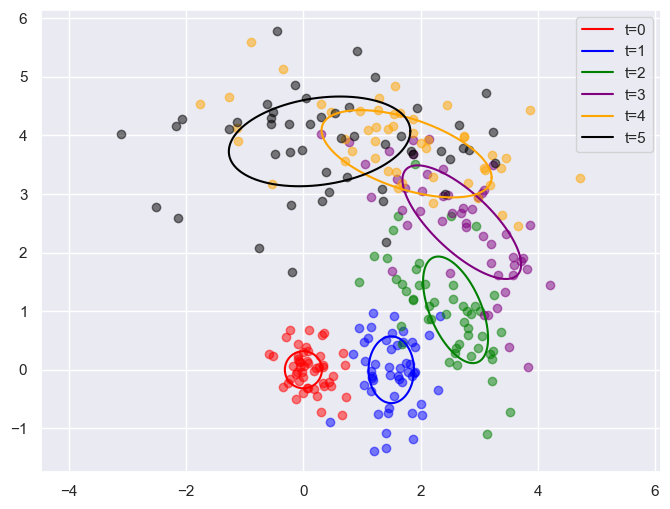

In [11]:
def plot_ellipse(mean, cov, color='red', label=None):
    angles = np.linspace(0, 2 * np.pi, 100)
    circle = np.array([np.cos(angles), np.sin(angles)]) 
    L = cholesky(cov[:2, :2])  
    ellipse = (L @ circle + mean[:2, np.newaxis]).T 
    plt.plot(ellipse[:, 0], ellipse[:, 1], color=color, label=label)

def propagate_system(mean: np.array, 
                     cov: np.array, 
                     n_steps: int,
                     control_noise: np.array, 
                     dt: float,
                     control: np.array):
    for _ in range(n_steps):
        x, y, theta = mean
        v, w = control

        G = np.array([
             [1, 0, -v*np.sin(theta)*dt],
             [0, 1, v*np.cos(theta)*dt],
             [0, 0, 1]
        ])
        
        B = np.array([
            [np.cos(theta) * dt, 0],
            [np.sin(theta) * dt, 0],
            [0, dt]
        ])

        mean = mean + np.array([
            dt * np.cos(theta) * v,
            dt * np.sin(theta) * v,
            dt * w
        ])

        cov = G @ cov @ G.T + B @ control_noise @ B.T
    
    return mean, cov


mu_0 = np.array([0, 0, 0])  # (x, y, theta)
Sigma_0 = np.array([[0.1, 0, 0], 
                    [0, 0.1, 0],
                    [0, 0, 0.1]])  
A = np.array([3, 1.5])  # (V, W)
dt = 0.5


R = np.array([[0.2, 0], 
              [0, 0.1]]) 

plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for t in range(6):
    mu_t, Sigma_t = propagate_system(mu_0, Sigma_0, t, R, dt=dt, control=A)
    plot_ellipse(mu_t, Sigma_t, color=colors[t], label=f"t={t}")
    
    samples = np.random.multivariate_normal(mu_t[:2], Sigma_t[:2, :2], size=50)
    plt.scatter(samples[:, 0], samples[:, 1], color=colors[t], alpha=0.5)

plt.axis('equal')
plt.legend()
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

Comments: 
- (C) Linear dynamics, state noise
	- In this case, the noise is added directly to the state space, and it is uniformly distributed at each step.
	- Visually, we see a uniform increase in variance with time, resulting in an isotropic (almost circular) growth of the isocontour.
	- Errors accumulate linearly, which corresponds to the model without correlation.
- Conclusion: state noise leads to a monotonic increase in the spread but does not change the direction of the main trajectory.

- (D) Linear dynamics, noise in control
	- Here noise is imposed on the control (velocity, angular velocity) rather than directly on the state.
	- This leads to a skewed increase in covariance as each control passes the error on.
	- The distributions shift unevenly, creating elongated ellipses.

- Conclusion: control noise creates skewed distributions as the control error propagates through the entire system dynamics.

- (E) Nonlinear dynamics, state noise
	- Here the system is subject to nonlinear effects, such as those dependent on the rotation angle.
	- It can be seen that the distributions are more curved and the isocontours become abnormally elongated.
	- The distributions become highly asymmetric, which is typical for nonlinear systems.

- Conclusion: nonlinear systems are prone to uncontrolled error growth, which makes the prediction less accurate.

- (F) Nonlinear dynamics, control noise
	- The most interesting case: noise in the control accumulates through nonlinear transitions.
	- In contrast to (E), now the ellipses do not just grow, but are also highly deflected.
	- The point density becomes chaotic, indicating nonlinear error transmission.

- Conclusion: the combination of nonlinearity and noise in the control leads to maximum uncertainty growth, which makes the system most sensitive to error accumulation.
